In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
"""
Fully Connected Neural Network - Load Training Data

3-layer neural network
Define nodes per layer; n0,n1,n2,n3
Import training data set from MNIST
m = total number of training samples
A0_batch = All training input data [n0,m]
Y_batch = All labels for Softmax [n3,m] = [10,m]
"""

# 3 layer network. ReLU x ReLU x Softmax
# Define nodes per layer
n0 = 784    # input layer 28x28
n1 = 200
n2 = 100
n3 = 10     # softmax 0-9

# import training data

# load the mnist training data CSV file into a numpy array
all = np.loadtxt('mnistdataset/mnist_train.csv',delimiter=',')         # 60000 samples
# all = np.loadtxt('mnistdataset/mnist_train_100.csv',delimiter=',')   # 100 samples

# number of training samples (rows in csv file)
m = all.shape[0]
print('no of training samples =',m)

# create input matrix [n0, m]
# disregard first element and scale 0 to 1.0 
A0_batch = np.array((((all[:,1:])/255.0)),ndmin=2).T

# create target matrix y = [n3, m]
Y_batch = np.zeros([n3,m])

# target is first number in each row
for i in range(m):
    Y_batch[int(all[i,0]),i] = 1

print("A0_batch shape =",A0_batch.shape)
print("Y_batch shape =",Y_batch.shape)

no of training samples = 60000
A0_batch shape = (784, 60000)
Y_batch shape = (10, 60000)


In [62]:
"""
Fully Connected Neural Network - Define Functions

"""

# define Relu activation forward function
def relu(x):
    return np.maximum(0,x)

# define Relu backward
def relu_back(da,z):
    dz = np.copy(da)
    dz[z <= 0] = 0
    return dz

# define Softmax forward function
def softmax(x):
    t=np.exp(x)
    t_sum=np.sum(t,axis=0)   
    a=t/t_sum
    
    return a

# define Softmax cost
def softmax_cost(a,y,m):
    x = -y * np.log(a)
    sum = (1/m)*np.sum(x)
    return(sum)


In [63]:
start = time.time()

"""
Train Fully Connected Neural Network - forward and back prop
Mini-Batch Gradient descent

3 layer network. ReLU -> ReLU -> Softmax
nodes n0,n1,n2,n3

parameters; W1,b1,W2,b2,W3,b3

hyperparameters;
learning rate = learn
no of epochs = epochs
mini batch size = m_mb
no of mini-batches = t

"""

# initialise parameters - weights and biases
W1 = np.random.randn(n1, n0) * 0.1
b1 = np.zeros((n1, 1))
W2 = np.random.randn(n2, n1) * 0.1
b2 = np.zeros((n2, 1))        
W3 = np.random.randn(n3, n2) * 0.1
b3 = np.zeros((n3, 1))

# cost function
cost = []

# initialise hyperparameters
learn = 0.15
epochs = 400
m_mb = 1000   # mini batch size
t = int(m/m_mb)  # no of mini batches

print("no. of epochs =",epochs)
print("no. of mini batches =",t)

for ep in range(epochs):
    for k in range(t):
    
        # select correct samples for the mini batch
        A0 = A0_batch[:,k*m_mb:(k+1)*m_mb]
        Y = Y_batch[:,k*m_mb:(k+1)*m_mb]
        
        # forward prop layer 1 - Relu
        Z1 = np.dot(W1,A0) + b1
        A1 = relu(Z1)
    
        # forward prop layer 2 - Relu
        Z2 = np.dot(W2,A1) + b2
        A2 = relu(Z2)
    
        # forward prop layer 3 - Softmax
        Z3 = np.dot(W3,A2) + b3
        A3 = softmax(Z3)

        ## calculate Cost function
        # rcost = softmax_cost(A3,Y,m_mb)  # latest cost
        # cost.append(rcost)
    
        ## print latest cost
        #if k % 10 == 0:
        #    print("epoch=",ep,"mini-batch=",k,"cost=",rcost)
    
        # backprop layer 3 - Softmax
        dZ3 = A3 - Y
        dW3 = (1/m)*np.dot(dZ3,A2.T)
        db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)
        dA2 = np.dot(W3.T,dZ3)
    
        # backprop layer 2 - Relu
        dZ2 = relu_back(dA2,Z2)
        dW2 = (1/m)*np.dot(dZ2,A1.T)
        db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
        dA1 = np.dot(W2.T,dZ2)
    
        # backprop layer 1 - Relu
        dZ1 = relu_back(dA1,Z1)
        dW1 = (1/m)*np.dot(dZ1,A0.T)
        db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
        # update parameters
        W1 = W1 - learn*dW1
        b1 = b1 - learn*db1
        W2 = W2 - learn*dW2
        b2 = b2 - learn*db2
        W3 = W3 - learn*dW3
        b3 = b3 - learn*db3
    
    # calculate cost after each mini batch
    rcost = softmax_cost(A3,Y,m_mb)  # latest cost
    cost.append(rcost)
    
    # print latest cost
    print("epoch=",ep,"cost=",rcost)
    
end = time.time()
print('final run time=',(end-start))
    


no. of epochs = 400
no. of mini batches = 60
epoch= 0 cost= 2.22918366133693
epoch= 1 cost= 2.0826649213780755
epoch= 2 cost= 1.9537858740808443
epoch= 3 cost= 1.8308369757640104
epoch= 4 cost= 1.7116047477131764
epoch= 5 cost= 1.5957865728750484
epoch= 6 cost= 1.4843929117661188
epoch= 7 cost= 1.378989714088465
epoch= 8 cost= 1.2808708970426992
epoch= 9 cost= 1.1910320241731915
epoch= 10 cost= 1.109533802934096
epoch= 11 cost= 1.036102652910937
epoch= 12 cost= 0.970385391052633
epoch= 13 cost= 0.9115296963288104
epoch= 14 cost= 0.858958600119743
epoch= 15 cost= 0.8119736904836812
epoch= 16 cost= 0.7700041391918772
epoch= 17 cost= 0.7323788724558775
epoch= 18 cost= 0.6985948424020496
epoch= 19 cost= 0.6681616653226904
epoch= 20 cost= 0.6406728178794613
epoch= 21 cost= 0.6157842682828798
epoch= 22 cost= 0.5931402876976479
epoch= 23 cost= 0.5725067196370955
epoch= 24 cost= 0.5536610321176507
epoch= 25 cost= 0.5363699549008054
epoch= 26 cost= 0.5204655338793941
epoch= 27 cost= 0.505776202

epoch= 227 cost= 0.20689026005498062
epoch= 228 cost= 0.20659215501326952
epoch= 229 cost= 0.20629525993744396
epoch= 230 cost= 0.205998831516066
epoch= 231 cost= 0.20570385464645422
epoch= 232 cost= 0.20540964675908924
epoch= 233 cost= 0.2051175406666404
epoch= 234 cost= 0.20482560726476698
epoch= 235 cost= 0.20453534877164828
epoch= 236 cost= 0.20424948281464014
epoch= 237 cost= 0.20396383184517186
epoch= 238 cost= 0.20368247479996676
epoch= 239 cost= 0.20340515890975333
epoch= 240 cost= 0.20312758560403416
epoch= 241 cost= 0.20284775313437764
epoch= 242 cost= 0.20257150566201598
epoch= 243 cost= 0.20229615705790358
epoch= 244 cost= 0.2020228965490474
epoch= 245 cost= 0.20175349887276003
epoch= 246 cost= 0.20148150465009876
epoch= 247 cost= 0.20121323867905283
epoch= 248 cost= 0.20094645491710264
epoch= 249 cost= 0.20067806768996838
epoch= 250 cost= 0.20040609895545497
epoch= 251 cost= 0.2001346230570559
epoch= 252 cost= 0.19985970194417127
epoch= 253 cost= 0.19958644916816523
epoch=

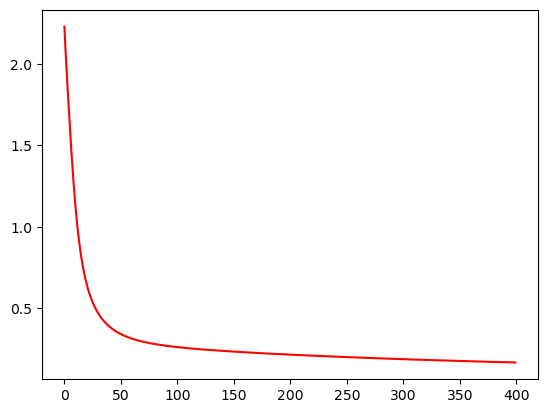

In [64]:
# plot cost

plt.plot(cost,color="r")
plt.show()

In [65]:
"""
Test the Neural Network
"""

# load the mnist test data CSV file into a numpy array
# all_test = np.loadtxt('mnistdataset/mnist_test_10.csv',delimiter=',')
all_test = np.loadtxt('mnistdataset/mnist_test.csv',delimiter=',')

# number of test samples (rows in csv file)
m_test = all_test.shape[0]
print('no of test samples =',m_test)

# create input matrix [n0, m_test]
# disregard first element and scale 0 to 1.0 
A0_test = np.array(((all_test[:,1:]) / 255.0),ndmin=2).T

# correct label is first number in each row
label_test = np.array(all_test[:,0],ndmin=2)

# go through all records in the test data set

scorecard=[]

# forward prop on test data
    
# forward prop layer 1 - Relu
Z1 = np.dot(W1,A0_test) + b1
A1 = relu(Z1)
    
# forward prop layer 2 - Relu
Z2 = np.dot(W2,A1) + b2
A2 = relu(Z2)
    
# forward prop layer 3 - Softmax
Z3 = np.dot(W3,A2) + b3
A3 = softmax(Z3)
    
# the index of the highest value corresponds to the label
predict = np.argmax(A3,axis=0,keepdims=True)

for i in range(m_test):
    # append correct or incorrect to list
    if (predict[0,i] == label_test[0,i]):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / m_test)




no of test samples = 10000
performance =  0.9399


In [ ]:
# plot handwritten numbers to check import

# image to view 
i=8

image = np.asfarray(A0_test[:,i]).reshape((28,28))

plt.imshow(image, cmap='Greys', interpolation='None')
print('number',i,'is =',all_test[i,0])
print('shape of image is',np.shape(image))